<a href="https://colab.research.google.com/github/skywalker0803r/deep-learning-ian-goodfellow/blob/master/XOR%E5%95%8F%E9%A1%8C.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [0]:
import torch
import torch.nn.functional as F
from torch import nn
import torch.optim as optim
import matplotlib.pyplot as plt
import numpy as np
from sklearn.linear_model import LinearRegression

# data

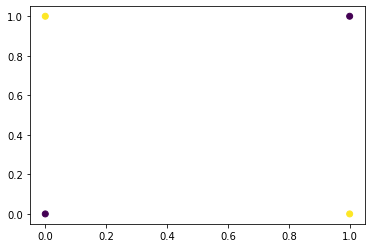

In [2]:
x = torch.tensor([[0,0],[0,1],[1,0],[1,1]],requires_grad=False).float()
y = torch.tensor([0,1,1,0],requires_grad=False).view(-1,1).float()
plt.scatter(x[:,0],x[:,1],c=y)

# LinearRegression

[[0.49999997]
 [0.5       ]
 [0.49999997]
 [0.5       ]]


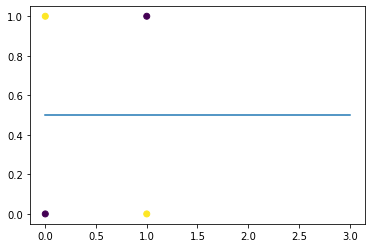

In [3]:
reg = LinearRegression()
reg.fit(x,y)
plt.plot(reg.predict(x))
plt.scatter(x[:,0],x[:,1],c=y)
print(reg.predict(x))
plt.show()

# define model

In [0]:
class Net(nn.Module):
    def __init__(self):
        super().__init__()
        self.fc1 = nn.Linear(2,2)
        self.fc2 = nn.Linear(2,1)
    
    def forward(self,x):
      x = self.fc1(x)
      x = F.sigmoid(x)
      x = self.fc2(x)
      return x

    def detail_forward(self,x):
      x1 = self.fc1(x)
      x2 = F.sigmoid(x1)
      x3 = self.fc2(x2)
      
      x1 = x1.detach().numpy().round(2)
      x2 = x2.detach().numpy().round(2)
      x3 = x3.detach().numpy().round(2)
      
      return x1,x2,x3

def init_weights(m):
    if hasattr(m,'weight'):
        torch.nn.init.xavier_uniform(m.weight)
    if hasattr(m,'bias'):
        m.bias.data.fill_(0.1)

In [5]:
net = Net()
net.apply(init_weights)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:26: UserWarning: nn.init.xavier_uniform is now deprecated in favor of nn.init.xavier_uniform_.


Net(
  (fc1): Linear(in_features=2, out_features=2, bias=True)
  (fc2): Linear(in_features=2, out_features=1, bias=True)
)

# train

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


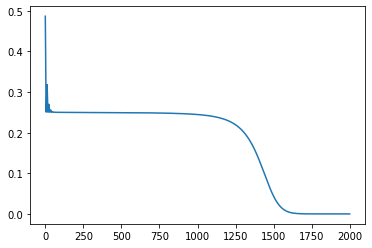

In [6]:
loss_func = nn.MSELoss()
optimizer = optim.SGD(net.parameters(), lr=0.02, momentum=0.9)

history = []
for i in range(2000):
  optimizer.zero_grad()
  loss = loss_func.forward(net(x),y)
  loss.backward()
  optimizer.step()
  history.append(loss.item())

plt.plot(history)

# result

[[0.]
 [1.]
 [1.]
 [0.]]


/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")
/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


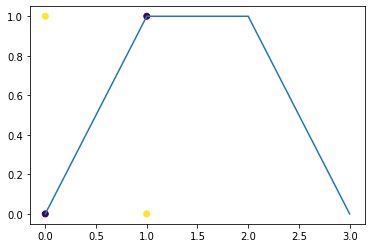

In [7]:
plt.plot(net(x).detach().numpy())
plt.scatter(x[:,0],x[:,1],c=y)
print(net(x).detach().numpy().round(2))
plt.show()

In [8]:
x1,x2,x3 = net.detail_forward(x)

/usr/local/lib/python3.6/dist-packages/torch/nn/functional.py:1569: UserWarning: nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.
  warnings.warn("nn.functional.sigmoid is deprecated. Use torch.sigmoid instead.")


In [9]:
x1

array([[-1.39,  1.66],
       [ 0.8 ,  4.53],
       [-3.5 , -1.08],
       [-1.3 ,  1.79]], dtype=float32)

In [10]:
x2

array([[0.2 , 0.84],
       [0.69, 0.99],
       [0.03, 0.25],
       [0.21, 0.86]], dtype=float32)

In [11]:
x3

array([[0.],
       [1.],
       [1.],
       [0.]], dtype=float32)

In [0]:
model = net
X = x
model_params = list(model.parameters())

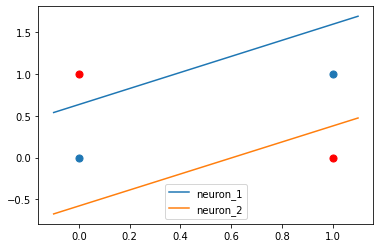

In [13]:
model_weights = model_params[0].data.numpy()
model_bias = model_params[1].data.numpy()

plt.scatter(X.numpy()[[0,-1], 0], X.numpy()[[0, -1], 1], s=50)
plt.scatter(X.numpy()[[1,2], 0], X.numpy()[[1, 2], 1], c='red', s=50)

x_1 = np.arange(-0.1, 1.1, 0.1)
y_1 = ((x_1 * model_weights[0,0]) + model_bias[0]) / (-model_weights[0,1])
plt.plot(x_1, y_1)

x_2 = np.arange(-0.1, 1.1, 0.1)
y_2 = ((x_2 * model_weights[1,0]) + model_bias[1]) / (-model_weights[1,1])
plt.plot(x_2, y_2)
plt.legend(["neuron_1", "neuron_2"], loc=8)
plt.show()